## Coast Train metadata plots: labeler distribution

Daniel Buscombe, Marda Science contracted to U.S Geological Survey Pacific Coastal and Marine Science Center

January, 2022


These plots describe the Coast Train "v1" dataset


Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read data

In [98]:
A = pd.read_csv('metadata/A_naip_meta_served.csv')
B = pd.read_csv('metadata/B_quads_gulf_meta_served.csv')
C = pd.read_csv('metadata/C_s2_meta_served.csv')
D = pd.read_csv('metadata/D_s2_4classes_meta_served.csv')
E = pd.read_csv('metadata/E_L8_meta_all_served.csv')
F = pd.read_csv('metadata/F_elwha_l8_served.csv')
G = pd.read_csv('metadata/G_madeira_meta_served.csv')
H = pd.read_csv('metadata/H_dauphin_meta_served.csv')
I = pd.read_csv('metadata/I_sandwich_metadata_served.csv')
J = pd.read_csv('metadata/J_naip_6class_meta_served.csv')

Define a list of dataset names

In [99]:
names = [
    'A: NAIP',
    'B: Quads',
    'C: S2',
    'D: S2-4class',
    'E: Landsat-8',
    'F: Landsat-8-Elwha',
    'G: Madeira',
    'H: Dauphin',
    'I: Sandwich',
    'J: NAIP-6class'
]

### Number of images labeled per labeler ID

Frequency histograms of labels by labeler ID

Create a text to integer mapping using a dict

In [100]:
mapping={'ID1':1, 'ID2':2, 'ID3':3, 'ID4':4,'ID5':5, 'ID6':6}

Cycle through each dataset, strip out ID from npz file name, and convert to an integer using the mapping

In [101]:
I_per_set = []
for dat in [A,B,C,D,E,F,G,H,I,J]:
   tmp = dat['annotation_image_filename'].values
   ID_string = [t.split('_')[-1].split('.npz')[0] for t in tmp]
   ID_num = [mapping[i] for i in ID_string]
   I_per_set.append(ID_num)

Get a list of all unique IDs, and make bins

In [102]:
all_ids = np.unique(np.hstack(I_per_set))
bins = np.arange(len(all_ids)+1)

In [103]:
bins

array([0, 1, 2, 3, 4, 5, 6])

For each dataset, count the number of IDs and plot as a bar (note: it might be tempting to use plt.hist  for this - don't. It is a horrible function and should be avoided at all costs. It basically doesnt work when you have only a single value)

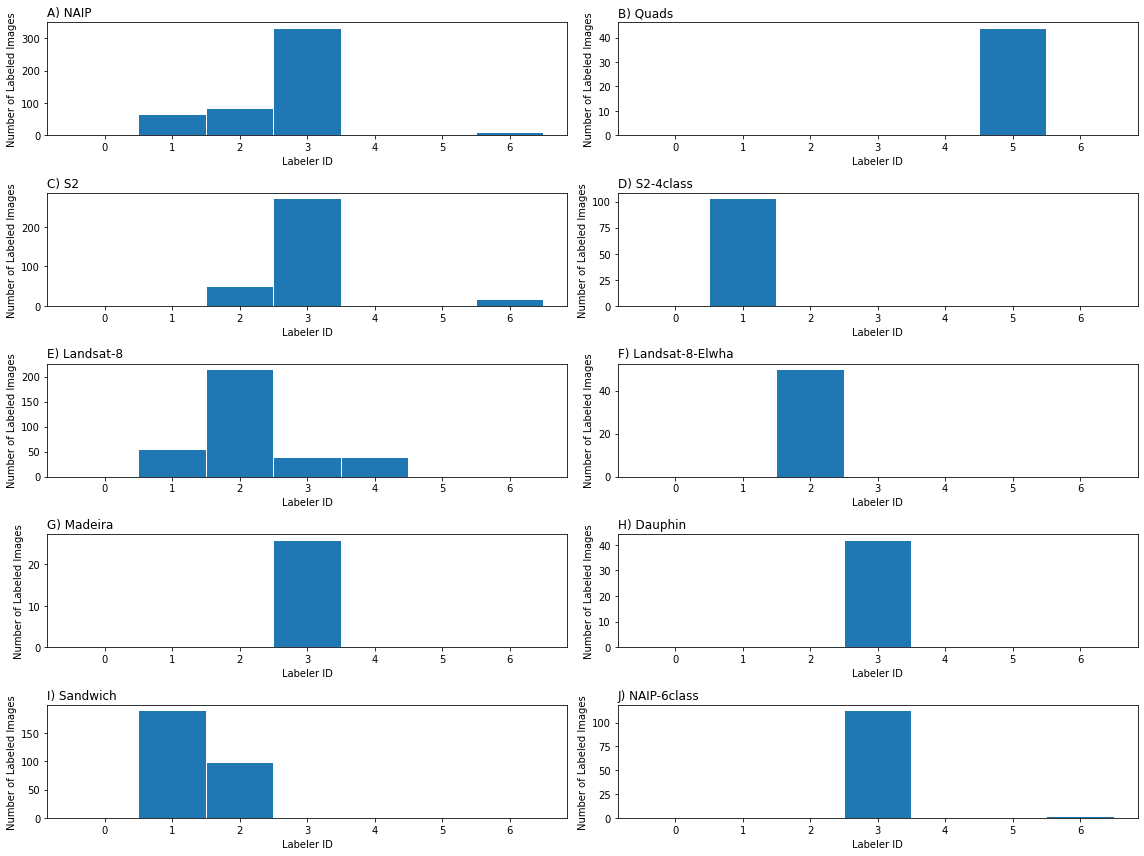

In [104]:
plt.rcParams["figure.autolayout"] = True

plt.figure(figsize=(16,12))
for counter,(i,name) in enumerate(zip(I_per_set, names)):
    plt.subplot(5,2,counter+1)
    v = [np.sum(i==n) for n in bins]
    plt.bar(bins,v,width=1, edgecolor='white', linewidth=1)

#     if counter==8:
    plt.ylabel('Number of Labeled Images')
    plt.xlabel('Labeler ID')
    plt.title(name.replace(':',')'), loc='left')

plt.savefig('Label_per_datarecord_per_ID.png',dpi=200, bbox_inches='tight')
                

Sum all the datasets by ID,. and plot as bars

In [105]:
all_ids_summed = [np.sum(np.hstack(I_per_set)==i) for i in all_ids]

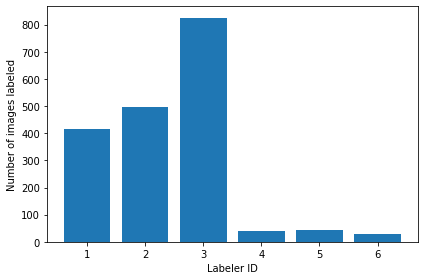

In [106]:
plt.bar(all_ids,all_ids_summed)
plt.xlabel('Labeler ID')
plt.ylabel('Number of images labeled')
plt.savefig('Label_all_datarecords_per_ID.png',dpi=200, bbox_inches='tight')

### number and proportion of pixels labeled

Create two lists, one for the number of million-pixels labeled, and the other for the percentage of those labeled pixels labeled by a human

In [108]:
million_px_labeled = []
million_px = []
for dat in [A,B,C,D,E,F,G,H,I,J]:
    million_px.append(np.sum((dat['ImageHeightPx']*dat['ImageWidthPx']))/1e6)
    
    million_px_labeled.append(np.sum((dat['ImageHeightPx']*dat['ImageWidthPx'])*dat['doodle_spatial_density'])/1e6)


prop_px_labeled = 100*(np.array(million_px_labeled)/ np.array(million_px))

In [109]:
prop_px_labeled

array([16.75845868,  6.56264785, 42.10965241, 22.31145739, 19.86481611,
       68.112163  , 16.03318361,  9.13826924,  6.17331695,  6.91093559])

/home/marda/anaconda3/envs/coastsat/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


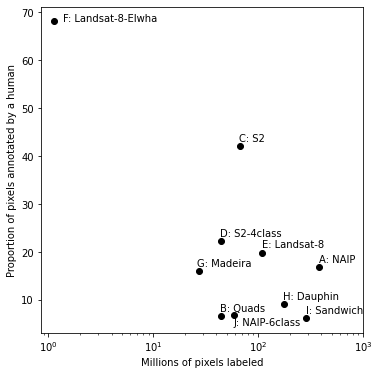

In [139]:
fig = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.semilogx(million_px,prop_px_labeled, 'ko')
plt.ylabel('Proportion of pixels annotated by a human')
plt.xlabel('Millions of pixels labeled')

for counter,(a,b,c) in enumerate(zip(million_px, prop_px_labeled, names)):

    if (counter!=9) and (counter!=5):
        plt.text(a-1, b+1, c)
    elif counter==5: 
        plt.text(a+.25, b, c)
        
    else:
        plt.text(a-.25, b-2.2, c)

plt.xlim(0,1000)

plt.savefig('Million_pixels_vs_percentage_doodled.png',dpi=200, bbox_inches='tight')